### Approach to Keras:

1. Declare a Model
   1. Sequential: Sequence of Layers
   2. Functional: Multiple models with sequences of layers interconnected
2. Declare the Layers
   1. Embedding Layer, Dense Layers, Dropout Layers
   2. Tune the layers (Number of Neurons, act func, input_shape)
   3. Specify the output Layers
3. Compile the Model
   1. Optimizer (SGD, Adam)
   2. Loss Function (LogLoss/CrossEntropy, RMSE, MSE, MAE)
   3. Metrics for Evaluation (F1, Precision, Recall, Acc)
4. Fit the model
   1. X & Y
   2. Epochs
   3. Verbose = Log of the model run information

Load the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

Load the dataset

In [4]:
data = pd.read_csv('/content/spam.csv', encoding = 'latin-1')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Drop the spill over columns

In [6]:
data = data.iloc[:,:2]

In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."



Separate the messages and the labels

In [8]:
# Extract message text and labels
messages = data["v2"].tolist()  # Assuming a "text" column for messages
labels = data["v1"].tolist()  # Assuming a "label" column for ham/spam (0 or 1)

Split data into train & test

In [9]:
x_train, x_test, y_train, y_test = train_test_split(messages, labels, test_size =0.2, random_state = 42)

In [10]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

4457
1115
4457
1115


CountVectorizer

In [11]:
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [12]:
# Convert labels to numerical values (0 for ham, 1 for spam)
y_train = [1 if labels == 'spam' else 0 for labels in y_train]
y_test = [1 if labels == 'spam' else 0 for labels in y_test]

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
x_train_vectorized.shape[1]

7735

Add Models and Layers

In [15]:
model = Sequential()
model.add(Dense(32, activation='tanh', input_shape=(x_train_vectorized.shape[1],))) #Input Layer & HL1
model.add(Dropout(0.3)) #Dropout to control overfitting
model.add(Dense(16, activation = 'tanh')) #HL2
model.add(Dropout(0.3)) #Dropout to control overfitting
model.add(Dense(2, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │         247,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 248,114 (969.20 KB)

 Trainable params: 248,114 (969.20 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model

In [18]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

Fit the model

In [19]:
x_train_vectorized.sort_indices()

In [20]:
history = model.fit(x_train_vectorized, y_train, epochs = 10, batch_size = 32, validation_data=(x_test_vectorized,y_test))

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8741 - loss: 0.3947 - val_accuracy: 0.9803 - val_loss: 0.0841
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9901 - loss: 0.0489 - val_accuracy: 0.9812 - val_loss: 0.0687
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9976 - loss: 0.0176 - val_accuracy: 0.9803 - val_loss: 0.0738
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9999 - loss: 0.0070 - val_accuracy: 0.9812 - val_loss: 0.0804
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.9803 - val_loss: 0.0927
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.9803 - val_loss: 0.0975
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9803 - val_loss: 0.1010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0

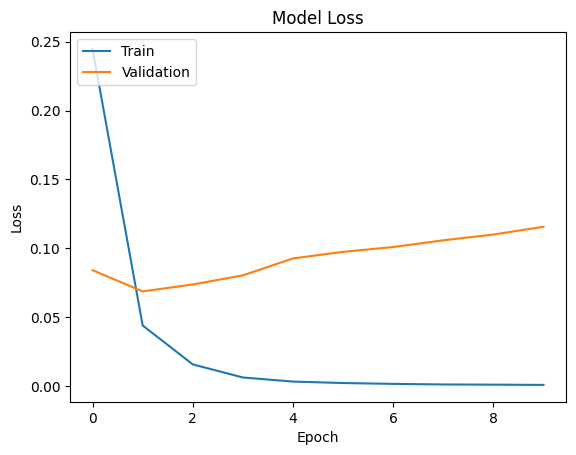

In [21]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
# Make predictions on new data (optional)
new_message = "let us go out"
new_message_vectorized = vectorizer.transform([new_message])
prediction = model.predict(new_message_vectorized)[0][0]
if prediction > 0.5:
  print("Predicted Spam")
else:
  print("Predicted Ham")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
Predicted Spam


In [23]:
print(model.predict(new_message_vectorized))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
[[0.9980507  0.00195461]]
